# Project 2: Getting Proficient!
------------------------------------------------
**Dr. Dave Wanik - OPIM 5502: Big Data Analytics with Cloud Computing - University of Connecticut**


* **Your Group Number: 2**
* **Each Team Members Name and Student ID: Urvashi Bhurase- 3059409, Ping-Jui Han- 3060359**



The purpose of this project is to help you master the topics of:
* blending Python and SQL
* using pandas UDFs
* writing window functions

Some of the earlier questions will be relatively straight-foward, but the last question or two will have many different approaches available for you to use. Make sure you check your work and show that your approach actually did what you wanted it to do!

# Install Spark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 3.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=0ecca3ba8d87f210f989eeb3f6791ce8a38602176c5e13ed086747e75962e32b
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


## Start a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Project2")\
        .getOrCreate()

In [ ]:
# some useful functions
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the Data
We will use the GSOD dataset from Chapter 10.

In [ ]:
# mount your Drive and update your Path
myDir = '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/Module_3/Module_3.4/window'
gsod = spark.read.parquet(myDir + '/gsod.parquet')

In [ ]:
# rows and columns
# 12M rows and 32 columns
print(gsod.count(), len(gsod.columns))

12460217 32


In [ ]:
# schema
gsod.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

In [ ]:
# look at the first few rows
gsod.show(10, truncate=False)

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|917350|99999|2018|04 |21 |82.6|9         |9999.9|0         |1006.9|9        |993.2 |9        |999.9|0          |3.7 |9         |8.5  |999.9|85.5|*       |74.5|        |0.31|G        |999.9|0  |0           |0               

🙏 Good luck!

# 🔵 (30 pts, 5 pts each) Blending Python and SQL

### Select all rows where `temp` is greater than 90 and where windspeed is greater than 20.

In [ ]:
gsod.createOrReplaceTempView("gsod1")
gsod1 = spark.sql(
 "select * from gsod1 where temp > 90 and wdsp > 20"
)
gsod1.show()

+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|   stn| wban|year| mo| da| temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min| prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|764990|99999|2018| 08| 26| 90.3|         9|  73.9|         9|1014.2|        9|1011.8|        9|  5.2|          9|999.9|         0|999.9|999.9|104.7|        |75.4|        |  0.0|        G|999.9|  0|           0|

### Print the count of rows and show first 10 rows to confirm your answer.

In [ ]:
print(gsod1.count(), len(gsod1.columns))
gsod1.show(10, False)

3741 32
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp |count_wdsp|mxpsd|gust |max  |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|764990|99999|2018|08 |26 |90.3|9         |73.9  |9         |1014.2|9        |1011.8|9        |5.2  |9          |999.9|0         |999.9|999.9|104.7|        |75.4|        |0.0 |G        |999.9|0  |0           |

### How many unique stations met the condition of temp>90 and wdsp>20?

In [ ]:
gsod.createOrReplaceTempView("gsod2")
gsod2 = spark.sql(
 "select count(distinct stn) as Number_of_unique_stations from gsod2 where temp > 90 and wdsp > 20"
)
gsod2.show()

+-------------------------+
|Number_of_unique_stations|
+-------------------------+
|                      283|
+-------------------------+



### Find the top 10 stations (`stn`) where the condition is true.

In [ ]:
gsod.createOrReplaceTempView("gsod3")
gsod3 = spark.sql(
# "select distinct stn, temp, wdsp from gsod3 where temp > 90 and wdsp > 20 sort by temp desc, wdsp desc limit 10"
 "select stn,count(stn) as total_stations from gsod3 where temp>90 and wdsp>20 group by stn order by total_stations desc limit 10"
)
gsod3.show()

+------+--------------+
|   stn|total_stations|
+------+--------------+
|999999|           804|
|406370|           294|
|406570|           186|
|406320|           118|
|408290|           108|
|406560|            99|
|406460|            85|
|406080|            84|
|406640|            72|
|406720|            70|
+------+--------------+



### Where is the top station (that is not 999999)? 
Below is the list of all GSOD stations - Google the location and let me know where it is by writing your answer and embedding a picture!

Here is a list of all the GSOD stations:
* http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GSOD/.MONTHLY/.Name/IWMO+exch+table-+text+text+skipanyNaN+-table+.html

406370 is **STATION KHANAQIN** -  it is hot and windy there with temperature 109.5 and wind speed 999.9. It is in Iraq.

![image](https://www.rudaw.net/ContentFilesArchive/29734Image1.jpg?version=192700)





### What month/year was the hottest and windiest at that particular station?

In [ ]:
gsod.createOrReplaceTempView("gsod3")
gsod3 = spark.sql(
 "select year, mo from gsod3 where stn = 406370 sort by temp desc, wdsp desc limit 1"
)
gsod3.show()

+----+---+
|year| mo|
+----+---+
|2018| 07|
+----+---+



So July 2018 was the hottiest and windiest month in KHANAQIN.

# 🔵 (30 pts total, 10 pts each) Pandas UDFs

## Return summary statistics of the `temp` and `wdsp` columns and note the range of values.

Please show the count, min 25th, 50th, 75th percentile and max value.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gsod5 = gsod.select('temp', 'wdsp')
gsod5.summary().show()

+-------+-----------------+------------------+
|summary|             temp|              wdsp|
+-------+-----------------+------------------+
|  count|         12460217|          12460217|
|   mean| 55.3946958708653|46.541189836597965|
| stddev|23.10463682915742| 195.7632871845211|
|    min|           -114.7|               0.0|
|    25%|             41.2|               3.5|
|    50%|             58.5|               5.6|
|    75%|             73.7|               8.7|
|    max|            110.0|             999.9|
+-------+-----------------+------------------+



In [ ]:
# # warning: this may take a few mins to run!
# i've pasted output below

#+-------+--------+--------+
#|summary|    temp|    wdsp|
#+-------+--------+--------+
#|  count|12460217|12460217|
#|    min|  -114.7|     0.0|
#|    25%|    41.2|     3.5|
#|    75%|    73.7|     8.7|
#|    max|   110.0|   999.9|
#+-------+--------+--------+

It looks like there are some missing values for the wdsp column.

Review this metadata for the units of each column:
* https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.txt

```
TEMP - Mean temperature (.1 Fahrenheit)
DEWP - Mean dew point (.1 Fahrenheit)
SLP - Mean sea level pressure (.1 mb)
STP - Mean station pressure (.1 mb)
VISIB - Mean visibility (.1 miles)
WDSP – Mean wind speed (.1 knots)
MXSPD - Maximum sustained wind speed (.1 knots)
GUST - Maximum wind gust (.1 knots)
MAX - Maximum temperature (.1 Fahrenheit)
MIN - Minimum temperature (.1 Fahrenheit)
PRCP - Precipitation amount (.01 inches)
SNDP - Snow depth (.1 inches)
```



## Write a Pandas UDF that converts temperature from F to C
Use a decorator! You can hack the example in the book.

In [ ]:
import pandas as pd
import pyspark.sql.types as T
 
 
@F.pandas_udf(T.DoubleType())                 
def f_to_c(degrees: pd.Series) -> pd.Series:  
    """Transforms Farhenheit to Celsius."""
    return (degrees - 32) * 5 / 9

Now add it as a column in `gsod`.

In [ ]:
from pyspark.sql.functions import col
gsod4 = gsod.withColumn("temp_celsius", f_to_c(col("temp")))

In [ ]:
gsod4.show()

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+
|   stn| wban|year| mo| da|temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|       temp_celsius|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+
|917350|99999|2018| 04| 21|82.6|         9|9999.9|         0|1006.9|        9| 993.2|        9|999.9|          0| 3.7|         9|  8.5|999.9|85.5|       *|74.5|   

In [ ]:
gsod4.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

## Write a Pandas UDF that converts `WDSP` from knots to m/s

Be careful - I think there are missing values coded as 999 - make these rows the number 0 instead of 999 and convert to a numeric data type.

In [ ]:
gsod.createOrReplaceTempView("gsod6")
gsod6 = spark.sql(
 "select * from gsod6"
)
gsod6.printSchema()
gsod6.show()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

In [ ]:
gsod6 = gsod6.withColumn("wdsp", col("wdsp").cast("double"))
gsod6.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: double (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

In [ ]:
gsod6 = gsod6.replace(["999"], ["0"], "wdsp")

Write a pandas UDF to convert `wdsp` from knots to meters per second.

In [ ]:
import pandas as pd
import pyspark.sql.types as T
 
 
@F.pandas_udf(T.DoubleType())                 
def knots_to_metre_per_second(knots: pd.Series) -> pd.Series:  
    """Transforms knots to ms"""
    return knots * 0.514444

Now apply the pandas UDF to the `wdsp` column.

In [ ]:
gsod6 = gsod6.withColumn("wdsp_m_per_s", knots_to_metre_per_second(col("wdsp")))

In [ ]:
gsod6.printSchema()
gsod6.show()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: double (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

# 🔵 (20 pts total, 10 pts each) Window Functions

## Station Quality

In [ ]:
# these are the total number of stations - 12k
print('These are the counts of all stations:', gsod.select('stn').distinct().count())
# look at stations with sparse data quality - 9.9k
tmp = gsod.groupby('stn').count().orderBy('count')
# let's keep stations that have 300*3 = 900 observations
tmp = tmp.where(f'count > 900').select('stn', 'count')
print('These are the counts of stations with decent data quality:', tmp.distinct().count())
tmp.show()

These are the counts of all stations: 12832
These are the counts of stations with decent data quality: 9963
+------+-----+
|   stn|count|
+------+-----+
|760400|  901|
|627900|  901|
|943930|  902|
|718433|  902|
|368710|  903|
|014650|  903|
|817520|  903|
|717360|  903|
|817880|  904|
|719043|  904|
|423720|  904|
|618560|  905|
|722363|  905|
|703333|  905|
|724856|  905|
|368830|  905|
|268500|  905|
|272230|  905|
|160360|  905|
|819090|  906|
+------+-----+
only showing top 20 rows



In [ ]:
# make a plot of those stations with good data quality
import matplotlib.pyplot as plt
import pandas as pd

tmp = tmp.toPandas()
tmp.describe()

,count
count,9963.000000
mean,1105.040149
std,3123.529808
min,901.000000
25%,1076.000000
50%,1085.000000
75%,1086.000000
max,312826.000000


## Rolling Averages

Read this:
* https://stackoverflow.com/questions/45806194/pyspark-rolling-average-using-timeseries-data

...decide which answer is closest to our GSOD dataset, and decide if you need to use rowBetween and rangeBetween! Remember your data is in daily data right now and that you may not have a perfect of observations each day.

First, hack listing 10.20 in the book and create a unix timestep column.

In [ ]:
gsod.createOrReplaceTempView('gsod7')
gsod7 = (
    gsod.withColumn("dt",
        F.to_date(
            F.concat_ws("-", F.col("year"), F.col("mo"), F.col("da"))
        ),
    )
    .withColumn("dt_num", F.unix_timestamp("dt"))
)
gsod7 = gsod7.withColumn('dt', gsod7.dt.cast('timestamp'))
gsod7.show()

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|   stn| wban|year| mo| da|temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|                 dt|    dt_num|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|917350|99999|2018| 04| 21|82.6|         9|9999.9|         0|1006.9|        9| 993.2|        9|999.9|          0| 3.7|         9| 

In [ ]:
print(gsod7.count(), len(gsod7.columns))

12460217 34


Now select one station for demonstation purposes - let's just use `stn == 406370` for demo purposes.

In [ ]:
gsod8 = gsod7.select("*").where("stn == 406370")
gsod8.show()

+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|   stn| wban|year| mo| da| temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|                 dt|    dt_num|
+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|406370|99999|2018| 12| 24| 52.4|         4|44.4|         4|1022.9|        4|9999.9|        0|  6.2|          4|999.9|         

In [ ]:
print(gsod8.count(), len(gsod8.columns))

887 34


Convert this data sample toPandas() and make a nice line plot of `temp` vs. date. Remember to convert the date to a datetime and then set the index as the date column in order to get a nice looking graph.

In [ ]:
from pyspark.sql.window import Window
import datetime
gsod8 = gsod8.withColumn('rolling_temp', F.avg("temp").over(Window.partitionBy(F.window("dt", "3 days"))))
gsod8.show()

+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+------------------+
|   stn| wban|year| mo| da|temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|                 dt|    dt_num|      rolling_temp|
+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+------------------+
|406370|99999|2017| 01| 04|46.5|         4|42.0|         4|1023.5|        4|

In [ ]:
import matplotlib.pyplot as plt
Pandas_gsod8 = gsod8.select("*").toPandas()

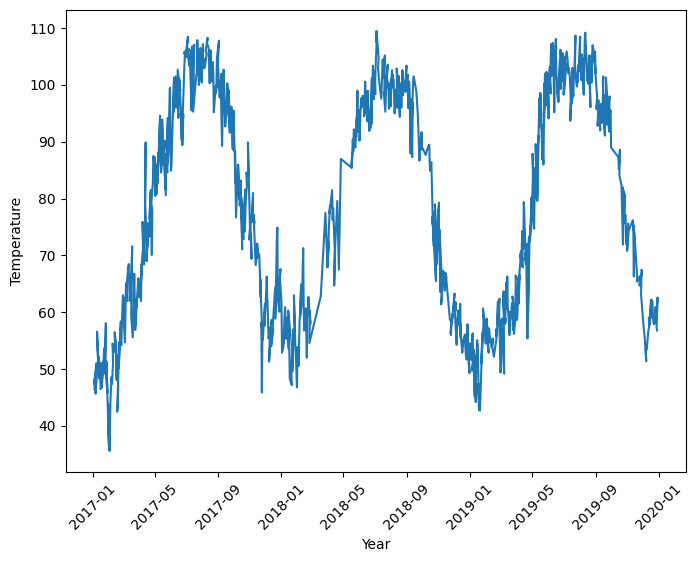

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(Pandas_gsod8['dt'], Pandas_gsod8['temp'])
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.xticks(rotation=45)
plt.show()

Check to make sure there are no missing values in the `temp` column.

In [ ]:
gsod9 = spark.sql(
 "select count(temp) as temp from gsod7 where temp = null"
)
gsod9.show()

+----+
|temp|
+----+
|   0|
+----+



Check out the data quality of April 2018 and show 30 rows for this station. Make a comment about the data quality.

In [ ]:
gsod10 = gsod8.select("*").where(" year == 2018 and mo == 04").orderBy("da")
gsod10.show()

+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+-----------------+
|   stn| wban|year| mo| da|temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|                 dt|    dt_num|     rolling_temp|
+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+-----------------+
|406370|99999|2018| 04| 01|69.5|         6|52.7|         6|1012.6|        6|999

In [ ]:
print(gsod10.count(), len(gsod10.columns))

14 35


50% of data for the month of April not available. Data might be of good quality in the sense there is no missing value for temp but insufficient data can will affects the accuracy of prediction drastically. Interpretation made for the month of April based on this data isn't reliable.

Create the window function for a 3 day rolling temperature (remember - time matters!) The window should be composed of today, yesterday, and two days ago. 

**Note:** The example from the book is not directly applicable here - make sure you check your work and work out some of the math to confirm your rolling window function did what it was supposed to do!

In [ ]:
w = Window.orderBy('dt').rowsBetween(-2, 0)

gsod11 = gsod10.withColumn('rolling_temp', F.avg('temp').over(w))

In [ ]:
gsod11.show(30, False)

+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+-----------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp|count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp |count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|dt                 |dt_num    |rolling_temp     |
+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+-----------------+
|406370|99999|2018|04 |01 |69.5|6         |52.7|6         |1012.6|6        |999

Make a line plot with the raw temperature value (in blue) and the rolling window temperature value (in orange).

In [ ]:
import matplotlib.pyplot as plt
pandas_gsod11 = gsod11.select("*").toPandas()

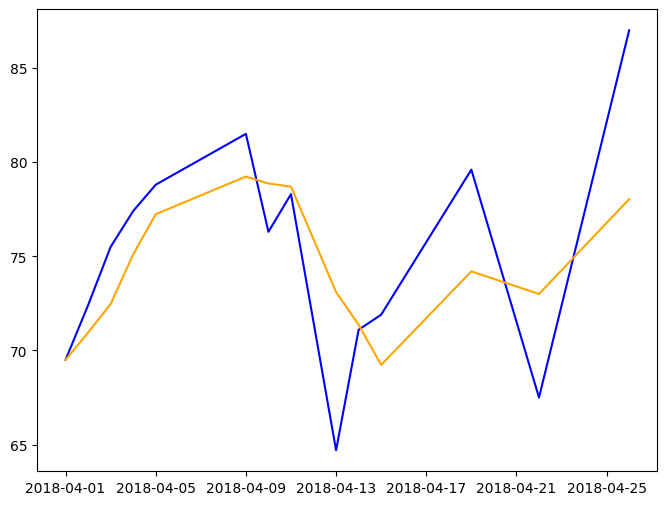

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(pandas_gsod11['dt'], pandas_gsod11['temp'], color='blue')
plt.plot(pandas_gsod11['dt'], pandas_gsod11['rolling_temp'], color='orange')

# 🔵 (20 pts total) Pandas UDFs and/or Window Functions

This is probably the hardest part of the project - spend some time on this and try a few different approaches if needed! I recommend just using a single station with all observations - how about station 406370? 

## Consecutive Values Above Threshold
I would like a new column in the PySpark DataFrame that contains the maximum consecutive values above a threshold (>=90 degF).

If the raw values are [91, 89, 88, 93, 94, 101, 85], then the output should be [1, 0, 0, 1, 2, 3, 0]. You are summing cumulative logical values!

Read this:
* https://stackoverflow.com/questions/73121080/count-consecutive-numbers-from-a-column-of-a-dataframe-in-python
* https://datascience.stackexchange.com/questions/77644/count-the-max-number-of-consecutive-1-and-0-in-pandas-dataframe
* ... and Chapters 8, 9 and 10 in your book

In [ ]:
gsod7.createOrReplaceTempView('gsod12')
gsod12 = spark.sql(
 "select * from gsod12 where temp > 90 and wdsp > 20"
)
gsod12.show()

+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|   stn| wban|year| mo| da| temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min| prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|                 dt|    dt_num|
+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+-------------------+----------+
|764990|99999|2018| 08| 26| 90.3|         9|  73.9|         9|1014.2|        9|1011.8|        9|  5.2|          9|999.

Now go code it up!

In [ ]:
from pyspark.sql.functions import lag, when, sum as pyspark_sum
from pyspark.sql.window import Window

# Define the threshold temperature
threshold = 90

# Define a window function that partitions the data by date
# and orders the data by the date in ascending order
window_spec = Window.partitionBy("dt").orderBy("dt")

# Create a new column that indicates whether the temperature is
# above the threshold
df_with_threshold = gsod12.withColumn("above_threshold", when(gsod12["temp"] >= threshold, 1).otherwise(0))

# Create a new column that indicates whether the temperature has
# changed from above the threshold to below the threshold or vice versa
df_with_change = df_with_threshold.withColumn("change", df_with_threshold["above_threshold"] - lag(df_with_threshold["above_threshold"], 1).over(window_spec))

# Create a new column that indicates the length of the current run
# of temperatures above the threshold
df_with_run_length = df_with_change.withColumn("run_length", pyspark_sum(when(df_with_change["change"] != 0, 0).otherwise(1)).over(window_spec))

# Create a new column that indicates the maximum run length for each date
df_with_max_run_length = df_with_run_length.groupBy("dt").agg({"run_length": "max"}).withColumnRenamed("max(run_length)", "max_run_length")

# Join the original dataframe with the dataframe containing the
# maximum run lengths
gsod13 = gsod12.join(df_with_max_run_length, "dt", "left_outer").fillna(0, subset=["max_run_length"])

In [ ]:
gsod13.show()

+-------------------+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|                 dt|   stn| wban|year| mo| da| temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|    dt_num|max_run_length|
+-------------------+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|2018-07-11 00:00:00|999999|53139|2018| 07| 11|103.2|        24|9999.9|     

Check your answer on May 2018 for Station 406370 visually! Plot your raw temperature on one graph (as you see below) and plot your cumulative sum above a threshold on another graph. Then visually compare to make sure you solved it correctly. You can use a Pandas UDF only (hint: look at Chapters 8 and 9) and/or you can cleverly combine it with a Window function.

**CHECK YOUR WORK!!!**

In [ ]:
gsod13 = gsod13.select("*").where("stn == 406370")
gsod13.show()

+-------------------+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|                 dt|   stn| wban|year| mo| da| temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|    dt_num|max_run_length|
+-------------------+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|2018-05-28 00:00:00|406370|99999|2018| 05| 28| 99.0|         4|58.1|         4|10

In [ ]:
gsod13 = gsod13.select("*").where(" year == 2018 and mo == 05").orderBy("da")
gsod13.show()

+-------------------+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|                 dt|   stn| wban|year| mo| da|temp|count_temp|dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min|prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|    dt_num|max_run_length|
+-------------------+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+----------+--------------+
|2018-05-19 00:00:00|406370|99999|2018| 05| 19|90.4|         5|58.1|         5|1008.6

In [ ]:
import matplotlib.pyplot as plt
Pandas_gsod13 = gsod13.select("*").toPandas()

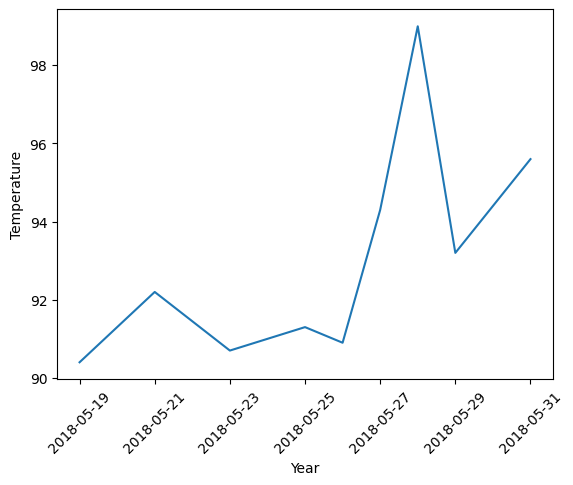

In [ ]:
plt.plot(Pandas_gsod13['dt'], Pandas_gsod13['temp'])
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

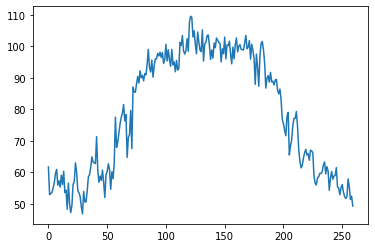

In [ ]:
# this is the raw data for May 2018 at station 406370

No need to apply to all stations in GSOD if it takes too long - just use your sample from stn == 406370.